In [57]:
#! pip install pyperclip

In [3]:
import duckdb
import pyperclip
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
import seaborn as sns
import numpy as np
pd.set_option('display.precision', 3)

In [4]:
con = duckdb.connect('household.duckdb')
df = con.execute(f'SELECT * FROM household').df()
con.close()

## Data profiling

In [5]:
def rm_total_rows(df):
    return df[pd.to_numeric(df['section'], errors='coerce').notnull()]
    

df = rm_total_rows(df)

### univariate anlaysis

In [6]:
df.dtypes

section                                                                    object
habitantes                                                                float64
single_women_aged_16_to_64                                                float64
single_men_aged_16_to_64                                                  float64
single_women_aged_65_or_over                                              float64
single_men_aged_65_or_over                                                float64
adult_women_with_one_or_more_minors                                       float64
adult_men_with_one_or_more_minors                                         float64
two_adults_from_16_to_64_and_without_minors                               float64
two_adults_one_at_least_65_and_without_minors                             float64
two_adults_and_one_minor                                                  float64
two_adults_and_two_minors                                                 float64
two_adults_and_t

In [7]:
df.describe()

,habitantes,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors
count,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,...,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000,7329.000
mean,528.872,48.079,47.395,51.515,15.039,11.033,2.225,65.191,71.452,29.175,...,10.300,3.702,42.690,21.031,3.267,1.410,19.295,22.344,0.230,0.160
std,170.889,31.490,33.014,21.728,6.665,9.535,2.935,33.039,29.016,22.895,...,8.368,3.337,13.907,14.643,2.595,1.605,7.676,12.737,0.645,0.427
min,71.000,1.000,3.000,1.000,0.000,0.000,0.000,3.000,1.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
25%,404.000,25.000,26.000,38.000,10.000,6.000,1.000,42.000,51.000,17.000,...,5.000,2.000,32.000,12.000,1.000,0.000,14.000,13.000,0.000,0.000
50%,498.000,40.000,39.000,50.000,14.000,9.000,1.000,59.000,68.000,23.000,...,8.000,3.000,41.000,17.000,3.000,1.000,18.000,19.000,0.000,0.000
75%,624.000,63.000,59.000,65.000,19.000,13.000,3.000,81.000,88.000,32.000,...,12.000,5.000,51.000,25.000,5.000,2.000,24.000,28.000,0.000,0.000
max,1646.000,237.000,310.000,154.000,47.000,133.000,31.000,305.000,196.000,306.000,...,83.000,44.000,105.000,119.000,29.000,21.000,56.000,108.000,9.000,6.000


In [8]:

pyperclip.copy(df.describe().to_latex())

/var/folders/nq/3myzrjtd3jz2711rk73fz2bw0000gn/T/ipykernel_10364/1700466542.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(df.describe().to_latex())


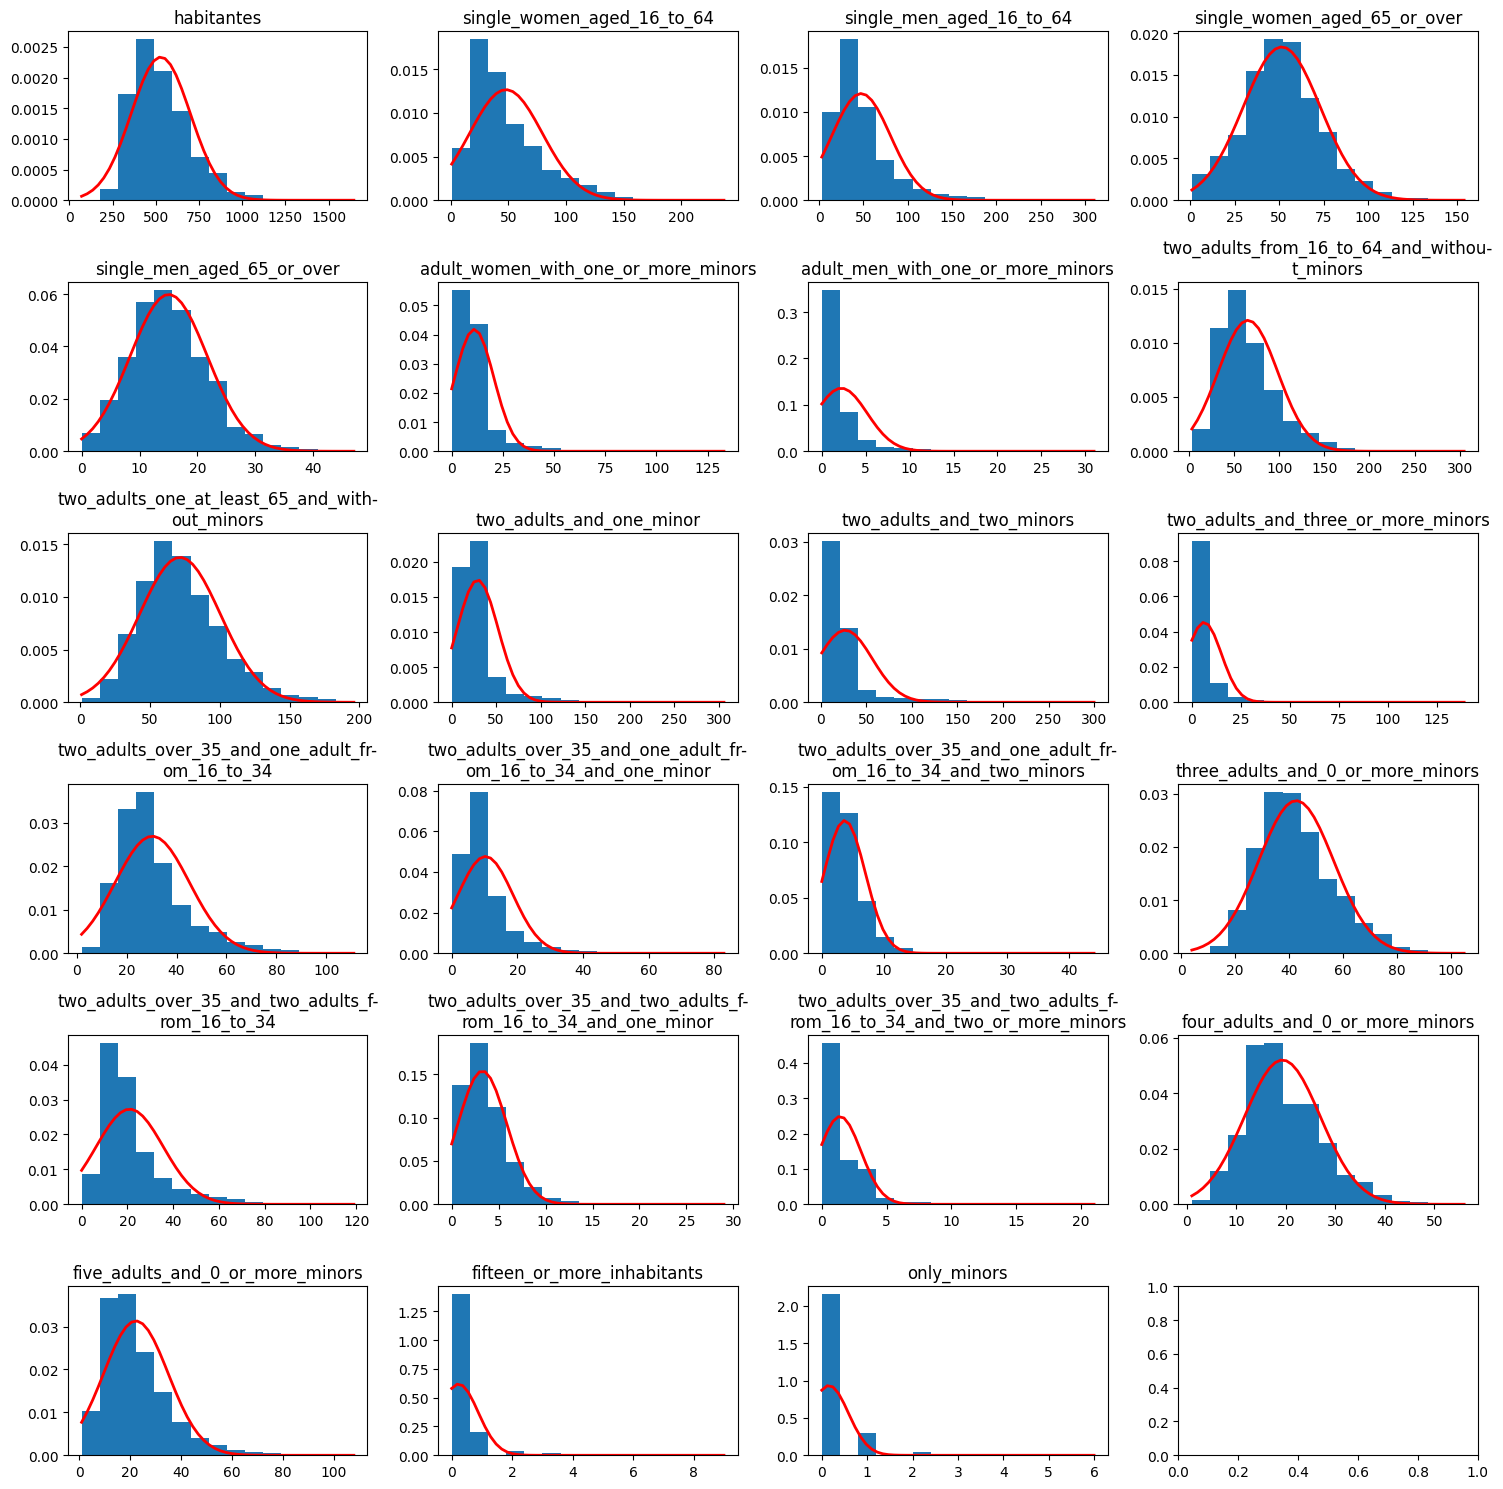

In [9]:
fig, axes = plt.subplots(6,4,figsize=(15,15))

# We skip section feature and year
for i, c in enumerate(df.columns[1:-1]):
    ax = axes.reshape(-1)[i]
    
    count, bins, ignore = ax.hist(df[c], 15, density=True)
    sigma=  df[c].std()
    mu=  df[c].mean()
    dbins = np.linspace(bins[0], bins[-1])
    ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (dbins - mu)**2
                         / (2 * sigma**2) ), linewidth=2, color='red')
                         
    title = f'{c[:35]}-\n{c[35:]}' if len(c) > 35 else c
    t = ax.set_title(title)
    
plt.tight_layout()


### Bivariate analysis

In [10]:
corrmat = df[1:-1].corr()
corrmat


/var/folders/nq/3myzrjtd3jz2711rk73fz2bw0000gn/T/ipykernel_10364/2550494025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df[1:-1].corr()


,habitantes,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors
habitantes,1.000,0.707,0.719,0.258,3.891e-01,0.648,0.526,0.835,0.266,0.703,...,0.495,0.366,0.585,4.426e-01,0.324,0.219,0.412,0.329,0.079,0.210
single_women_aged_16_to_64,0.707,1.000,0.901,0.209,3.659e-01,0.360,0.290,0.862,-0.105,0.402,...,0.070,0.025,0.202,-3.296e-03,-0.015,-0.024,0.082,0.040,0.068,0.174
single_men_aged_16_to_64,0.719,0.901,1.000,0.055,2.775e-01,0.454,0.370,0.887,-0.189,0.499,...,0.133,0.099,0.164,-9.027e-03,0.032,0.035,0.067,0.067,0.086,0.202
single_women_aged_65_or_over,0.258,0.209,0.055,1.000,6.607e-01,-0.240,-0.287,0.122,0.647,-0.234,...,-0.213,-0.184,0.463,-9.895e-02,-0.117,-0.034,0.344,0.152,-0.042,-0.030
single_men_aged_65_or_over,0.389,0.366,0.277,0.661,1.000e+00,-0.115,-0.148,0.290,0.530,-0.119,...,-0.135,-0.091,0.473,-9.663e-04,-0.042,-0.012,0.335,0.186,0.028,0.023
adult_women_with_one_or_more_minors,0.648,0.360,0.454,-0.240,-1.147e-01,1.000,0.722,0.508,-0.175,0.851,...,0.531,0.468,0.109,2.481e-01,0.327,0.239,0.035,0.089,0.045,0.200
adult_men_with_one_or_more_minors,0.526,0.290,0.370,-0.287,-1.479e-01,0.722,1.000,0.387,-0.189,0.722,...,0.396,0.410,0.062,2.430e-01,0.259,0.122,-0.024,0.026,0.052,0.185
two_adults_from_16_to_64_and_without_minors,0.835,0.862,0.887,0.122,2.902e-01,0.508,0.387,1.000,-0.072,0.588,...,0.293,0.146,0.293,1.870e-01,0.120,0.096,0.179,0.132,0.051,0.196
two_adults_one_at_least_65_and_without_minors,0.266,-0.105,-0.189,0.647,5.300e-01,-0.175,-0.189,-0.072,1.000,-0.155,...,-0.014,-0.073,0.633,2.415e-01,0.013,-0.015,0.441,0.158,-0.020,-0.056
two_adults_and_one_minor,0.703,0.402,0.499,-0.234,-1.190e-01,0.851,0.722,0.588,-0.155,1.000,...,0.583,0.375,0.099,2.915e-01,0.269,0.167,0.014,0.029,-0.012,0.198


<AxesSubplot:>

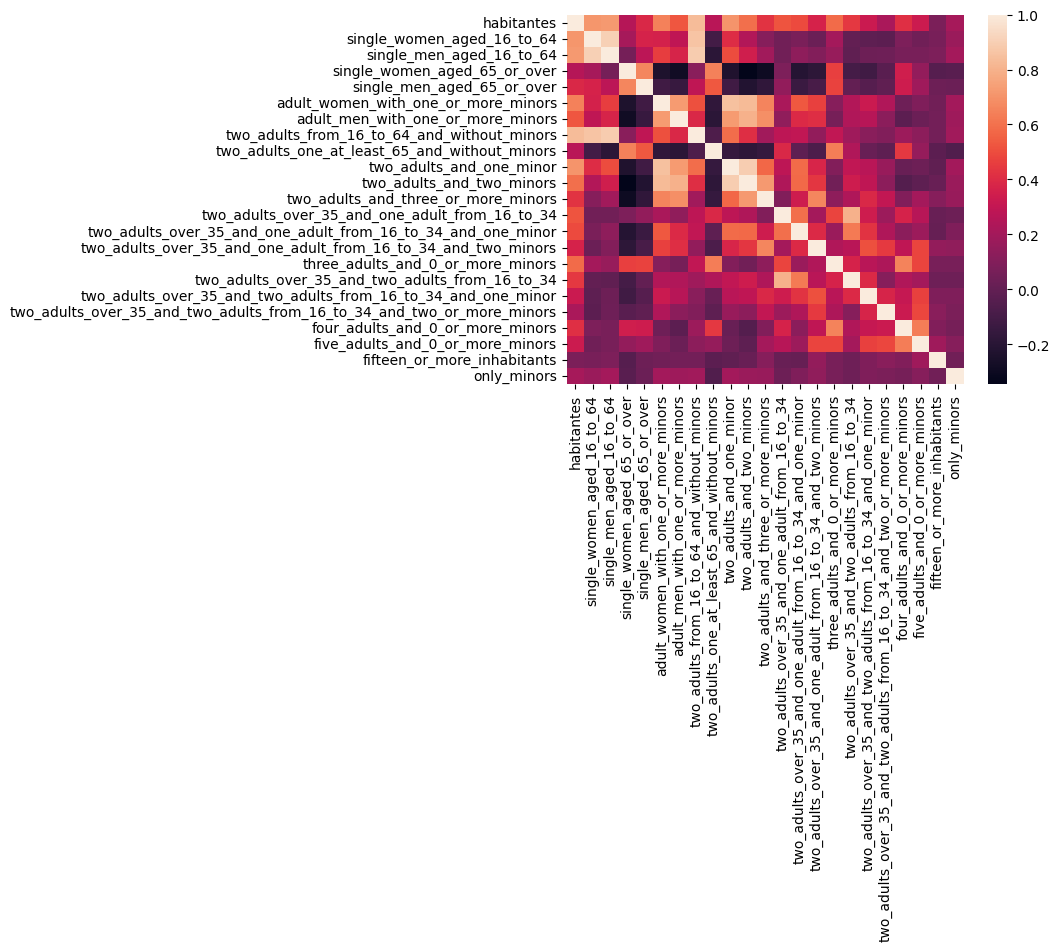

In [11]:

sns.heatmap(corrmat, square=False,)

### Duplicates

In [12]:
duplicate = df[df.duplicated()]
duplicate.sum() # there are no duplicates, is empty

section                                                                   0.0
habitantes                                                                0.0
single_women_aged_16_to_64                                                0.0
single_men_aged_16_to_64                                                  0.0
single_women_aged_65_or_over                                              0.0
single_men_aged_65_or_over                                                0.0
adult_women_with_one_or_more_minors                                       0.0
adult_men_with_one_or_more_minors                                         0.0
two_adults_from_16_to_64_and_without_minors                               0.0
two_adults_one_at_least_65_and_without_minors                             0.0
two_adults_and_one_minor                                                  0.0
two_adults_and_two_minors                                                 0.0
two_adults_and_three_or_more_minors                             

### Missing values

In [13]:
df.isnull().sum() # there are no missing values is empty

section                                                                   0
habitantes                                                                0
single_women_aged_16_to_64                                                0
single_men_aged_16_to_64                                                  0
single_women_aged_65_or_over                                              0
single_men_aged_65_or_over                                                0
adult_women_with_one_or_more_minors                                       0
adult_men_with_one_or_more_minors                                         0
two_adults_from_16_to_64_and_without_minors                               0
two_adults_one_at_least_65_and_without_minors                             0
two_adults_and_one_minor                                                  0
two_adults_and_two_minors                                                 0
two_adults_and_three_or_more_minors                                       0
two_adults_o